### Name - Yash Kumar
### Roll No - 101903780
### Group - 4CO28

# I have used Light Gradient Boosting Machine for the problem of Road sensor dataset

## Declaration and Preprocessing

In [18]:
import random
import math
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from google.colab import files
import io

In [19]:
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['DATASET.xlsx']))

Saving DATASET.xlsx to DATASET (5).xlsx


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [20]:
df.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [21]:
clear_idx = 910
lst_to_clear = [clear_idx+i for i in range(9)]
df.fillna(0, inplace=True)
df.drop(lst_to_clear, inplace = True)

In [22]:
df.rename(columns = {'Unnamed: 0':'Section_name'}, inplace = True)

In [23]:
mul = 10
j = 0
for i in range(100):
  sec_name = df.iloc[j,0]
  df.iloc[j:j + mul, 0] = sec_name
  j += mul
test_frame = df.loc[df['year'] == 10]
df.head()

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


# Training and Testing

In [24]:
model = LGBMRegressor(random_state=19)

In [25]:
column_name = ["Para-"+str(i) for i in range(9,14)]
def getXYsplit(df, row_start, row_end):
  XY = []
  XY.append(df.iloc[row_start:row_start + 9, 1:10])
  XY.append(df.iloc[row_start:row_start + 9, row_end])
  XY.append(df.iloc[row_start + 9, 1:10].to_numpy())
  XY.append(df.iloc[row_start + 9, row_end])
  return XY

In [26]:
pred_values = defaultdict(lambda : [])
target_col = [10,11,12,13,14]
root_mean_square_error = []
total_count = 0
curr_section = 0
total_squared_error = 0
max_val = 1000
for j in target_col:
  local_squared_error = 0
  l_count = 0
  LXY = [0,0,0,0]
  for i in range(0, max_val, 10):
    LXY = getXYsplit(df,i,j)
    x_train, y_train,x_test,y_test = LXY[0],LXY[1],LXY[2],LXY[3]
    model.fit(x_train, y_train)
    ypred = model.predict(x_test.reshape(1,-1))[0]
    pred_values[column_name[curr_section]].append(ypred)
    total_squared_error = (ypred - y_test)**2 + total_squared_error
    l_count += 1
    total_count += 1
  curr_section += 1
predicted_df = pd.DataFrame.from_dict(pred_values)

In [27]:
print("RMSE: " + str((total_squared_error/total_count)**0.5))

RMSE: 67.78317036916836


# Plotting

In [28]:
df.head()

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [29]:
random_rows = [random.randint(0,90) for i in range(40)]

## Plot for Parameter-9

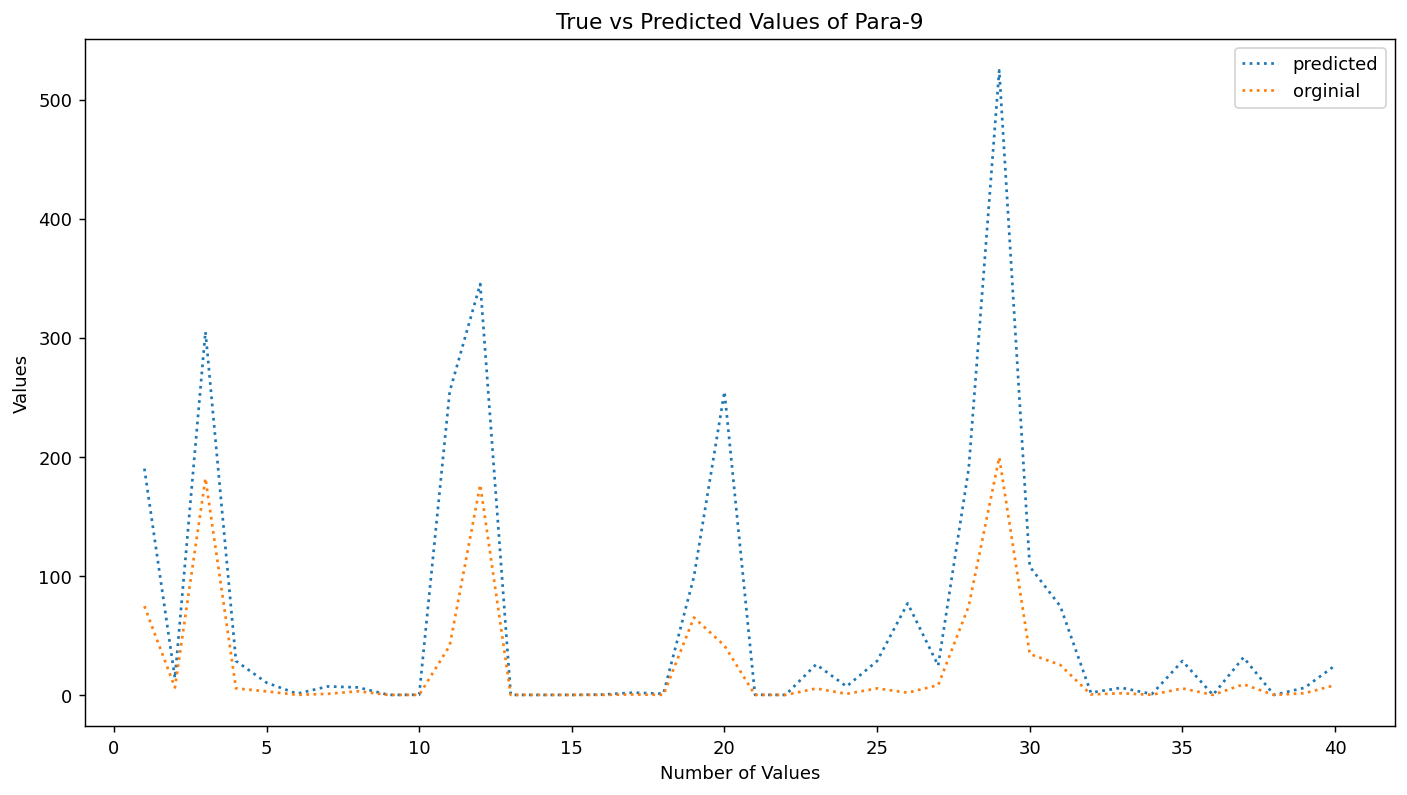

In [30]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,10]
x_value = [i+1 for i in range(len(true_value))]
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-9')
plt.legend(loc = 'upper right')

## Plot for Parameter-10

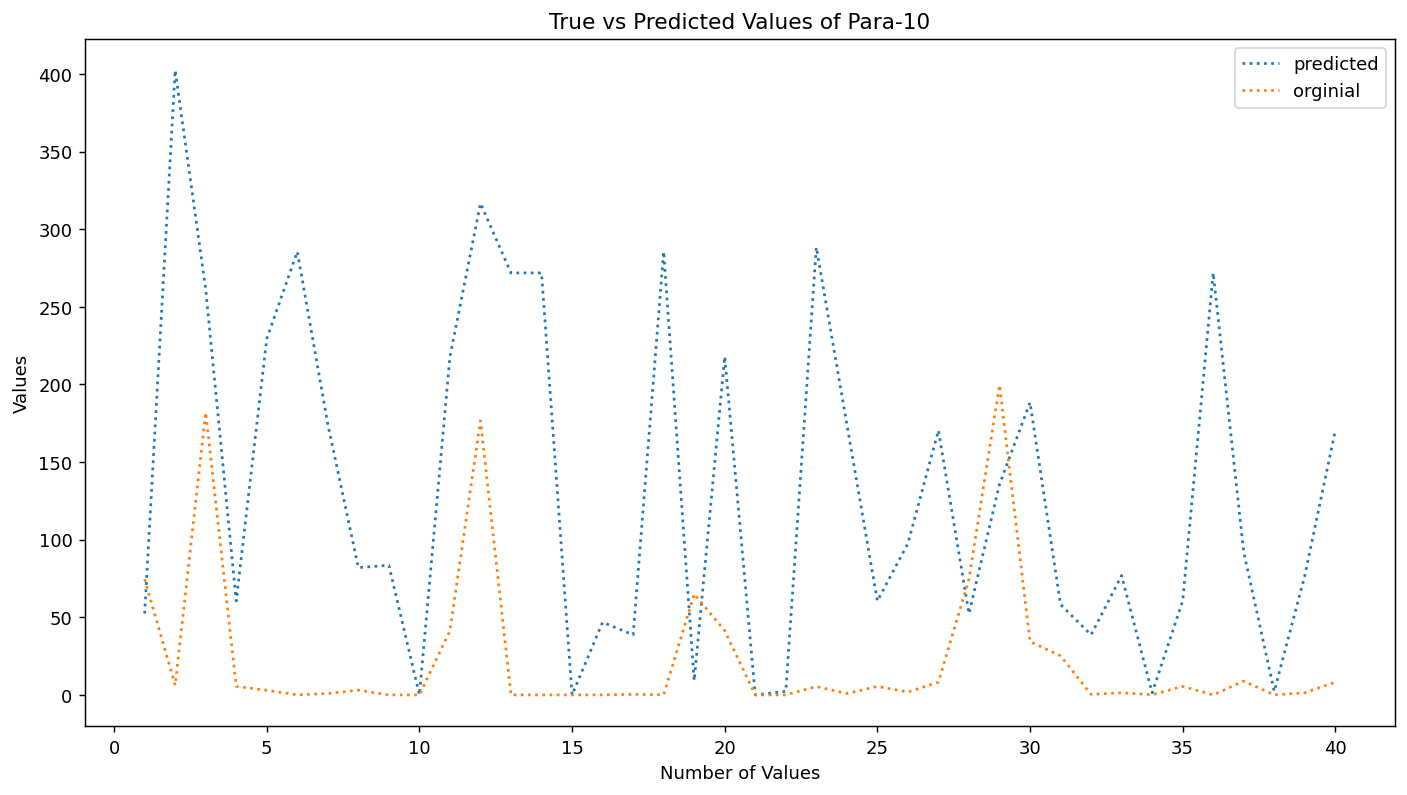

In [31]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,11]
x_value = [i+1 for i in range(len(true_value))]
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-10')
plt.legend(loc = 'upper right')

## Plot for Parameter-11

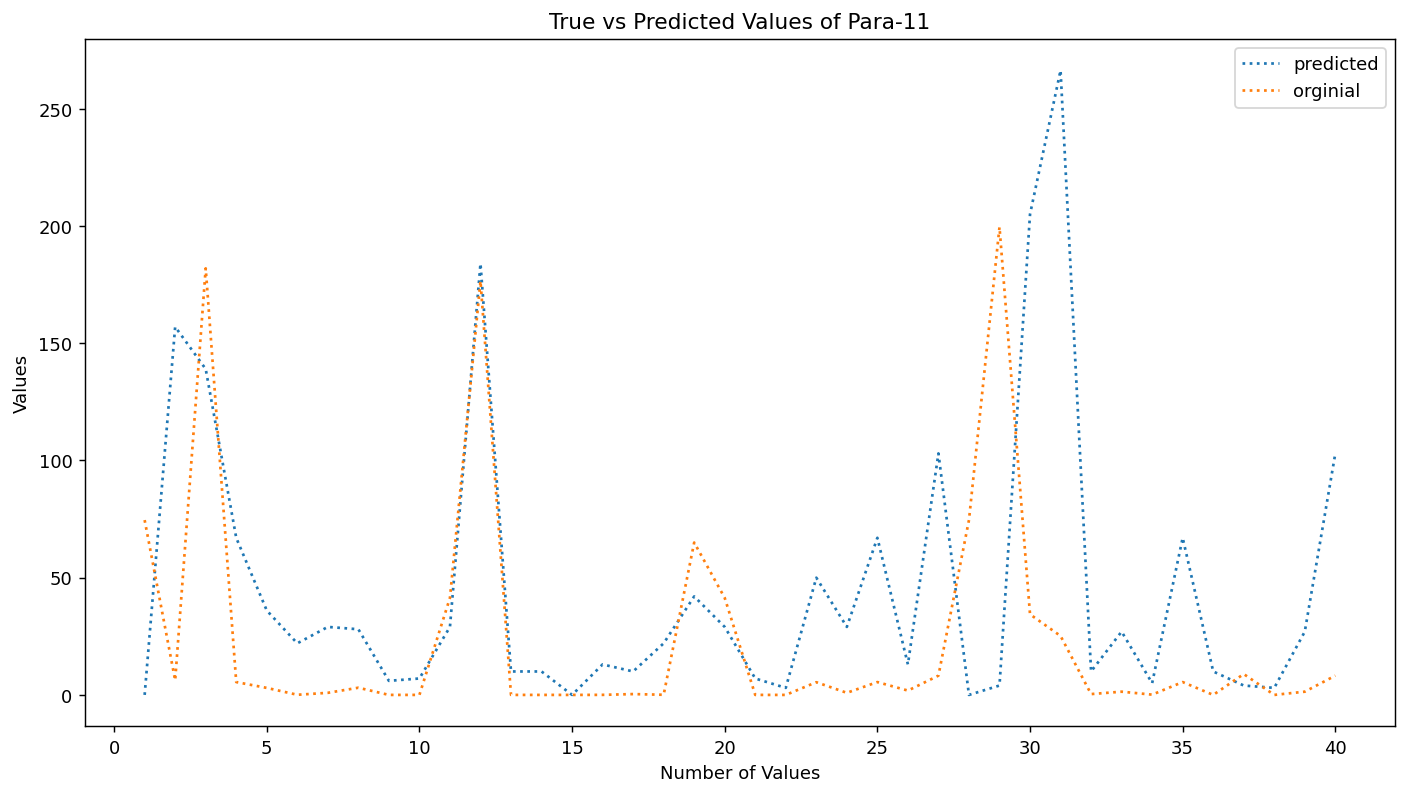

In [32]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,12]
x_value = [i+1 for i in range(len(true_value))]
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-11')
plt.legend(loc = 'upper right')

## Plot for Parameter-12

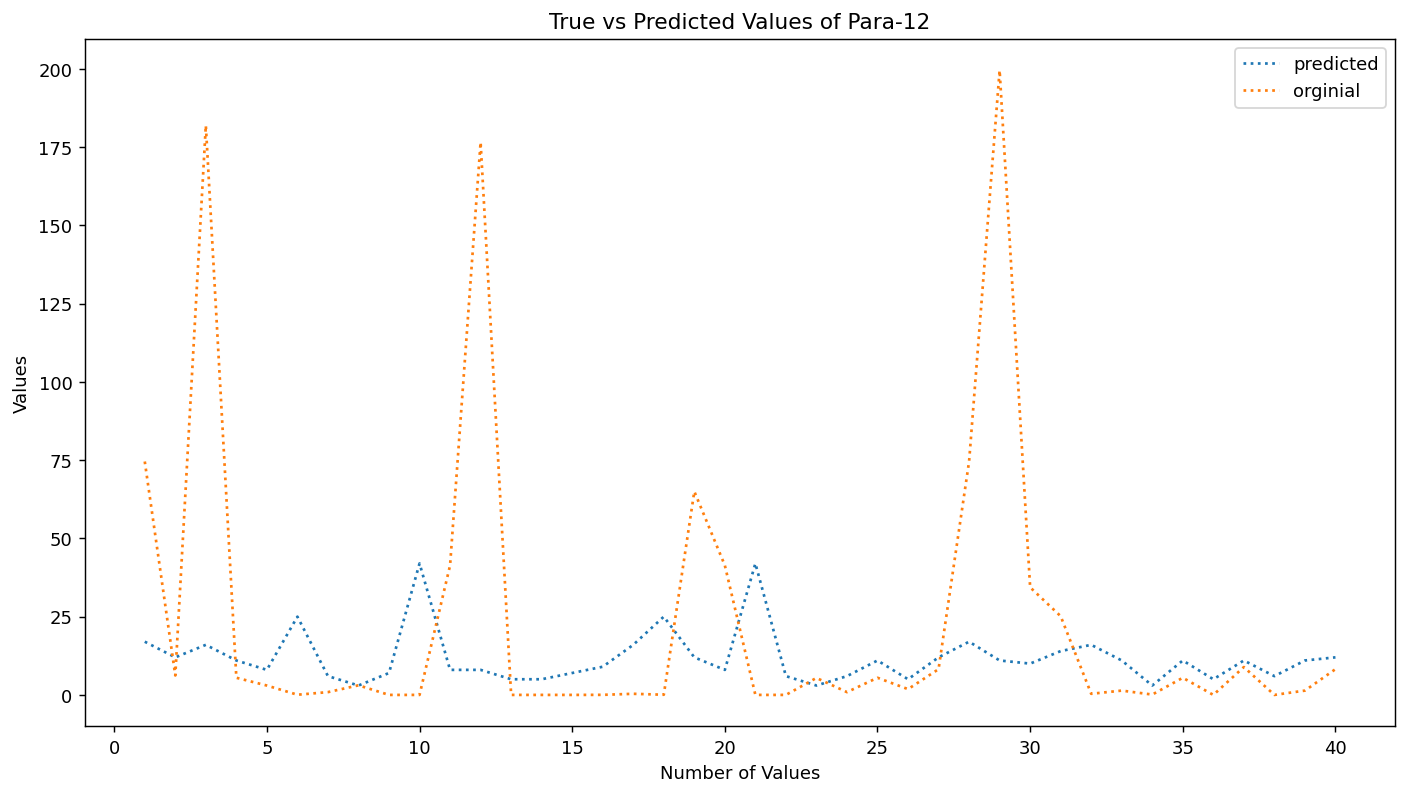

In [33]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,13]
x_value = [i+1 for i in range(len(true_value))]
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-12')
plt.legend(loc = 'upper right')

## Plot for Parameter-13

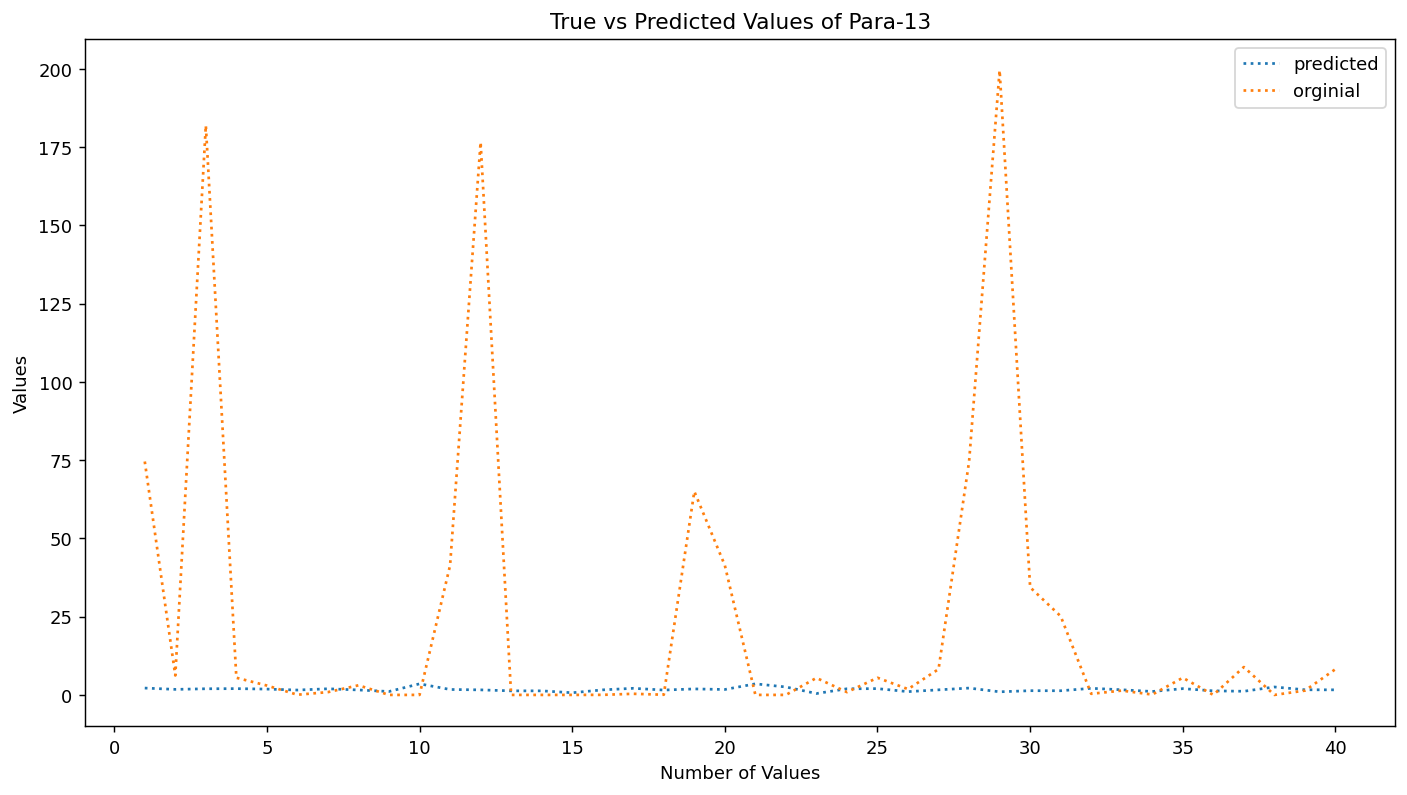

In [34]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,14]
x_value = [i+1 for i in range(len(true_value))]
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-13')
plt.legend(loc = 'upper right')